In [1]:
import numpy as np
import sklearn as sk
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [3]:
def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

In [4]:
def generate_stat(X_stat):
    for names in X_stat.drop(columns=['city','year','weekofyear','week_start_date']):
        X_stat['month_avg_'+names] = X_stat[names].rolling(3 ,min_periods=1).mean()
        X_stat['month_min_'+names] = X_stat[names].rolling(3 ,min_periods=1).min()
        X_stat['month_max_'+names] = X_stat[names].rolling(3 ,min_periods=1).max()
        X_stat['lag_3_'+names] = X_stat[names].shift(4)
        X_stat['byte_'+names] = X_stat[names].shift(1)
    return X_stat


In [5]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [6]:
def PP_Y(par_Y):
    par_Y = par_Y[(par_Y['city']=='iq')]
    return par_Y

In [7]:
def PP_X(par_X):
    par_X['week_start_date'] = pd.to_datetime(par_X['week_start_date'])
    par_X = par_X[(par_X['city']=='iq')]
#     par_X = generate_stat(par_X)
    par_X = par_X.drop(columns=[
        'weekofyear', 
        'week_start_date',
        'year',
        'city',
        
    ])
    par_X = par_X.fillna(method = 'bfill')
    return par_X

In [11]:
X = pd.read_csv("dengue_features_train.csv")
Y = pd.read_csv("dengue_labels_train.csv")
X_New = pd.read_csv("dengue_features_test.csv")
Y_New = pd.read_csv('submission_format.csv')
X , X_New = PP_X(X) , PP_X(X_New)
Y , Y_New = PP_Y(Y) , PP_Y(Y_New)

In [16]:
db = KMeans()
fit = db.fit(X)
pd.DataFrame(db.transform(X))

# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_clusters_

,0,1,2,3,4,5,6,7
0,179.466977,84.078798,158.675998,197.314264,311.123796,29.036810,92.812214,100.746955
1,109.227590,44.903342,98.901502,172.818027,244.563407,61.475121,24.884365,75.006851
2,123.184038,41.718537,116.402017,156.587609,259.860528,59.711361,50.231846,56.785825
3,193.180529,113.581207,148.904505,223.390782,305.074527,37.658524,96.946687,123.763433
4,142.620238,41.985715,151.996967,191.571908,295.094887,50.105734,74.063559,99.521708
5,195.844046,110.548754,165.210406,239.567353,320.334993,32.699490,102.734682,140.044133
6,75.079379,58.085926,96.704076,190.203933,224.170831,99.212050,38.309415,107.289727
7,142.055561,74.094320,113.875327,207.948338,266.812258,35.261956,47.059098,106.909674
8,127.368040,95.971780,85.071206,220.414566,234.362984,76.906087,42.754895,124.514528
9,119.741375,80.001092,87.942868,207.150900,237.424441,67.921984,30.057764,110.849919


## outlier

In [19]:
X , Y = X.loc[Y['total_cases'] <40] , Y.loc[Y['total_cases'] <40]

In [10]:
pca = PCA(n_components=10)
X2 = pd.DataFrame(pca.fit_transform(X),index=X.index)
X = pd.concat([X,X2],axis=1)
X_New2 = pd.DataFrame(pca.transform(X_New), index = X_New.index)
X_New = pd.concat([X_New,X_New2],axis=1)

# X = pd.DataFrame(pca.fit_transform(X),index=X.index)
# X_New = pd.concat([X_New,X_New2],axis=1)



## itteratively drop columns with high absalute correlation

In [22]:
columns_to_drop = find_correlation(X_New , 0.9)
X = X.drop(columns=columns_to_drop)
X_New = X_New.drop(columns=columns_to_drop)

In [11]:
Xrf = X
Yrf = Y['total_cases'].values.ravel()
X_testrf = X_New

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(Xrf,Yrf ,test_size=0.2)

In [20]:
X_train, X_test, Y_train, Y_test = Xrf[:int(len(X)*0.8)], Xrf[int(len(X)*0.8):] , Yrf[:int(len(Y)*0.8)] , Yrf[int(len(X)*0.8):]

In [24]:
rf = RandomForestRegressor()
model1 = rf.fit(X_train,Y_train)
predict = rf.predict(X_test)                                              
print(mean_absolute_error(Y_test, predict.round(0).astype(int)))  

6.115384615384615


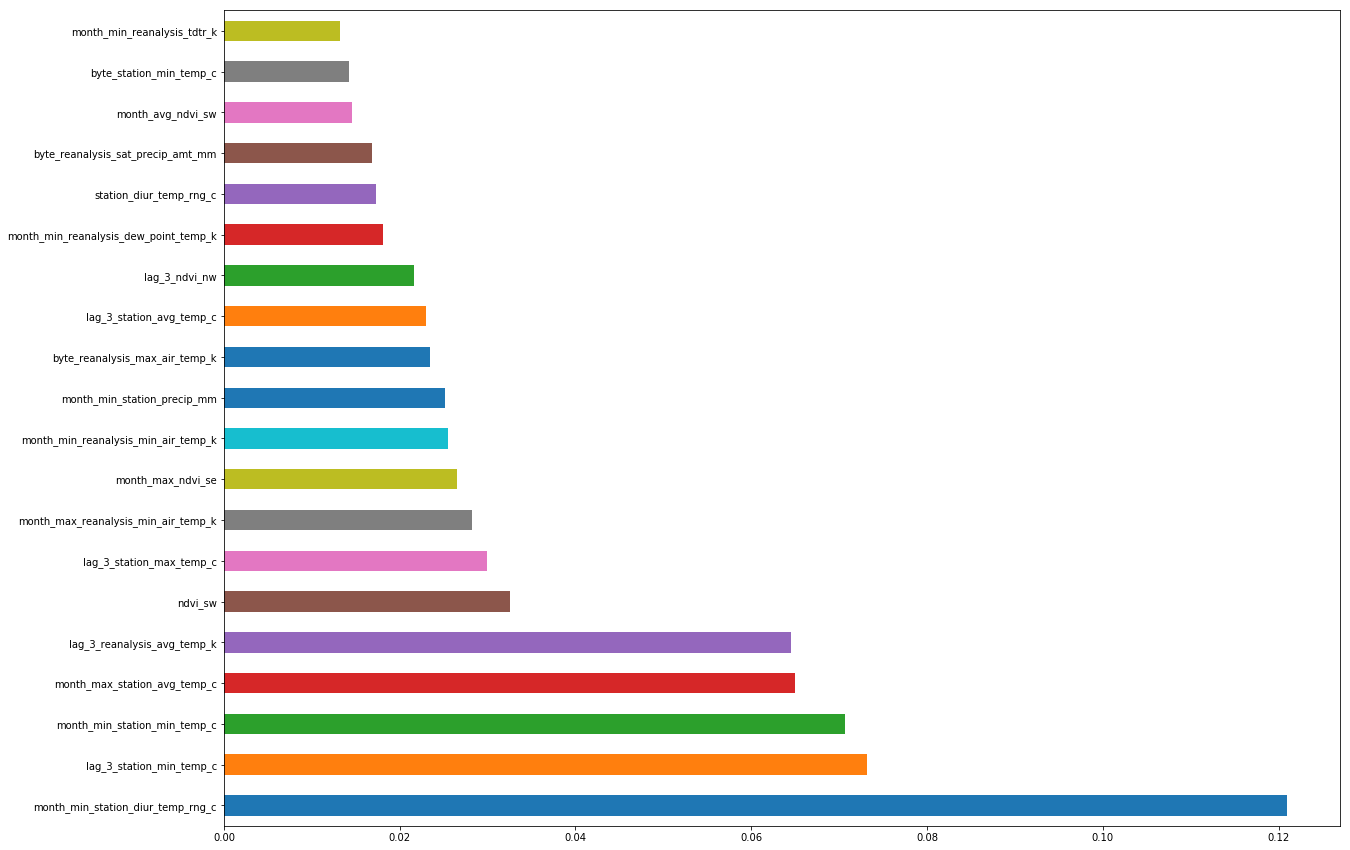

In [25]:
plt.figure(figsize=(20,15))
importance = rf.feature_importances_
feat_importances_act = pd.Series(importance, index=X_train.columns)
feat_importances = feat_importances_act.nlargest(20)
feat_importances.plot(kind='barh')

In [26]:
from sklearn import linear_model

reg = linear_model.Lasso (alpha = 0.0005 , positive=True)
reg.fit(X_train[feat_importances_act.nlargest(10).keys()],Y_train)
predict2 = reg.predict(X_test[feat_importances_act.nlargest(10).keys()])    
print(mean_absolute_error(Y_test, [max(x,0) for x in predict2.round(0).astype(int)]))
predict_New2 = reg.predict(X_testrf[feat_importances_act.nlargest(10).keys()])
predict_New2= [max(x,0) for x in predict_New2]
predict_New2


6.663461538461538


[7.997028396788551,
 8.788648900423425,
 8.28657102605382,
 0,
 0,
 0.11833415772173339,
 0,
 1.6797051890294483,
 4.349701520426208,
 6.5897329552009865,
 6.070417033364777,
 8.468164500446846,
 7.277322320099358,
 7.295267106131348,
 7.917870883931471,
 8.27387852930815,
 8.672484699489075,
 8.091394740458611,
 8.443052398647524,
 9.791470475909989,
 9.251664474134259,
 8.567836940160191,
 9.436552688055826,
 9.195015016811794,
 10.208937955361932,
 9.667576069441338,
 9.759879474558147,
 10.15720727872042,
 9.917094095512539,
 10.206140638725913,
 9.618078816004925,
 6.515823999910992,
 6.9859708842871555,
 8.928246920265337,
 7.413835982834996,
 8.410299944546011,
 8.916737644788952,
 9.282684558174594,
 7.722888755130668,
 8.230046172217953,
 9.398336080426986,
 8.296216145469202,
 6.648283887558307,
 7.846514575212154,
 8.16254243873965,
 9.451804802425897,
 7.663952129214749,
 7.087509627259351,
 7.8124549544789375,
 6.11361566151561,
 4.443313188409434,
 2.2126426056859145,
 1.

In [18]:
model1.predict(X_testrf)

array([ 7.7,  2. ,  5.2,  2.9,  4.5,  4.8,  3.4,  1.4,  1.9,  1. ,  3.7,
        2.3,  2.6,  5.1,  7. ,  5.3,  6.9,  3.4,  7.3,  9.3,  7.3,  3.4,
        7.7,  7.4,  9.5,  5.6,  8.4, 16.1, 12.8,  2.1,  3.9,  1.9,  4.8,
        6.8, 12.5,  7.1, 11.1, 10.9, 11. ,  9. ,  6.9,  5.3,  7.2,  4.4,
        8.1, 12.4, 10.3, 10.9,  3.5,  0.7,  0.9,  1.9,  2.6,  0.7,  2.2,
        0.4,  1.7,  1.7,  1.8,  3.2,  1.5,  4.3,  3.5,  1.9,  4. ,  4.9,
        6.5,  5.3, 11.1,  6.1,  7.5,  3.4,  5.5,  5.2,  4.7,  4.4,  8.5,
       14.3, 12.6,  5.5,  7.4,  7.3,  6.2,  4.8, 15.2,  6.5, 10.3,  4. ,
        3.7,  2.1,  4. ,  2.5,  2.6,  4.1,  5.9,  9.3, 10.8,  3.1,  3.5,
        3.9,  5. ,  5.3,  5. ,  3. ,  4. ,  2. ,  1.3,  3.7,  2.5,  3.7,
        5.9,  5. ,  2.8,  2.2,  3.1,  0.5,  4.8,  4.5,  1.9,  7.7,  2.6,
        4.8,  7.6,  9.4, 15.4, 14.5,  8.5, 10. ,  8.3,  6.6,  4.8, 14.9,
       15.7,  8.3,  3.8,  9.6,  8.1,  5.2, 11.3, 11.1,  9.4, 11.7,  4.6,
        5.1,  4.9,  4.4,  5.8,  4.9, 11.4,  5.3,  5

In [19]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train[feat_importances_act.nlargest(10).keys()],Y_train)
predict3 = clf.predict(X_test[feat_importances_act.nlargest(10).keys()])     
print(mean_absolute_error(Y_test, predict3.round(0).astype(int)))  
clf.predict(X_testrf[feat_importances_act.nlargest(10).keys()])


7.504854368932039


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 7,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 1, 0, 0, 0, 6, 0, 6, 0, 5, 0, 1, 0, 5, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 2, 7, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 5, 5, 5, 0, 0, 1, 6, 0, 0, 0,
       6, 6, 5, 0, 0, 9, 1, 7, 1, 7, 6, 0, 0, 6, 1, 0, 0, 6, 7, 0, 1, 6,
       0, 0])

In [20]:
from statsmodels.tsa.arima_model import ARIMA



In [21]:
Y_New['total_cases'] = np.array(predict_New2, dtype=np.float32).round(0)
Y_New['total_cases'] = Y_New['total_cases'].astype(int)
Y_New.to_csv('submission_iq.csv')
Y_New

,city,year,weekofyear,total_cases
260,iq,2010,26,6
261,iq,2010,27,6
262,iq,2010,28,6
263,iq,2010,29,3
264,iq,2010,30,3
265,iq,2010,31,2
266,iq,2010,32,2
267,iq,2010,33,4
268,iq,2010,34,4
269,iq,2010,35,6


In [22]:
print(mean_absolute_error(Y_test, predict2.round(0).astype(int)))  
predict_avg = (predict+predict2)/2
print(mean_absolute_error(Y_test, predict_avg.round(0).astype(int)))  


5.524271844660194
5.563106796116505


In [23]:
X_crr = X.copy(deep=True)
X_crr['total_cases'] = Y['total_cases']
corr = X_crr.corr()

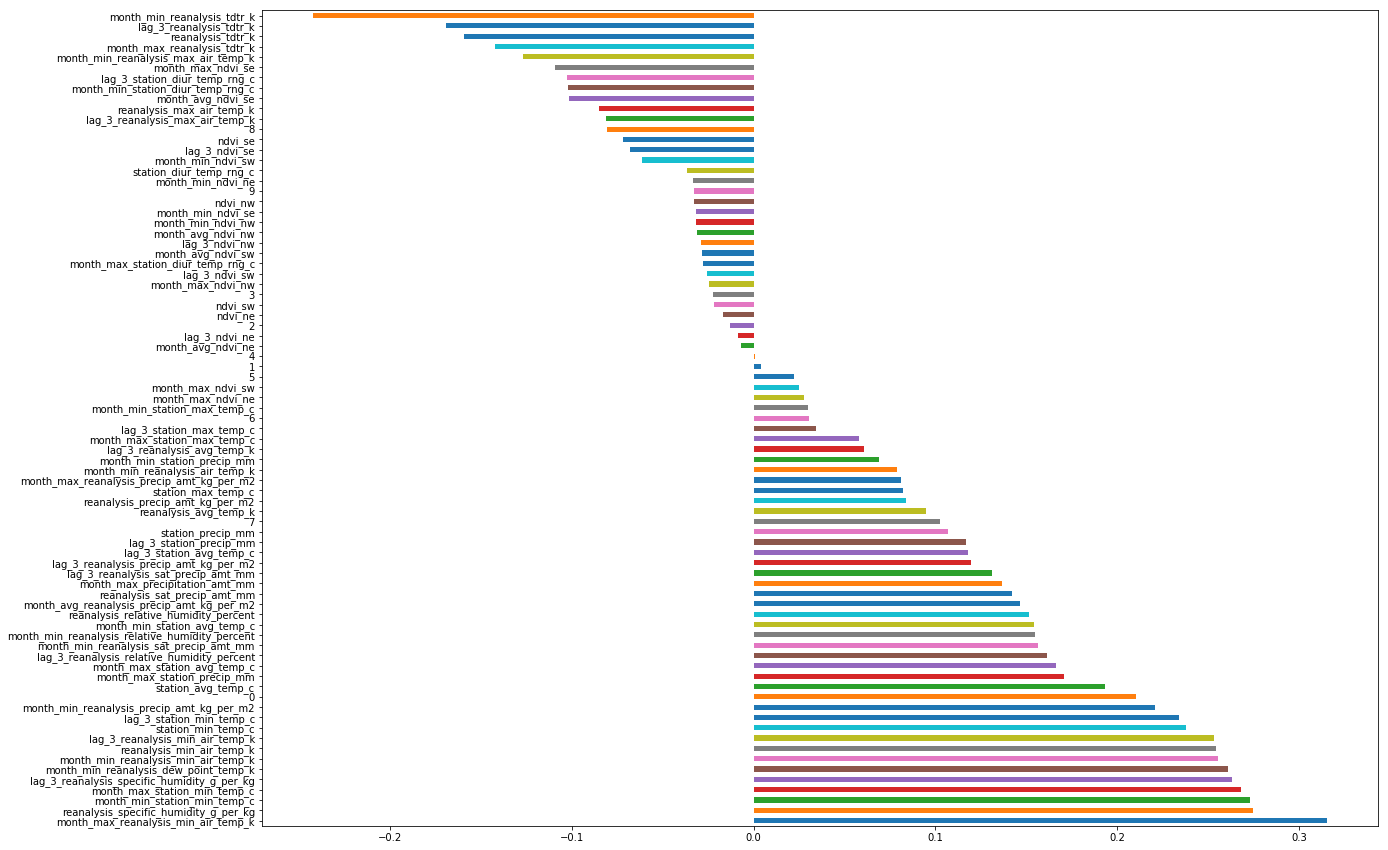

In [24]:
plt.figure(figsize=(20,15))
corr.total_cases.drop('total_cases').sort_values(ascending=False).plot.barh()

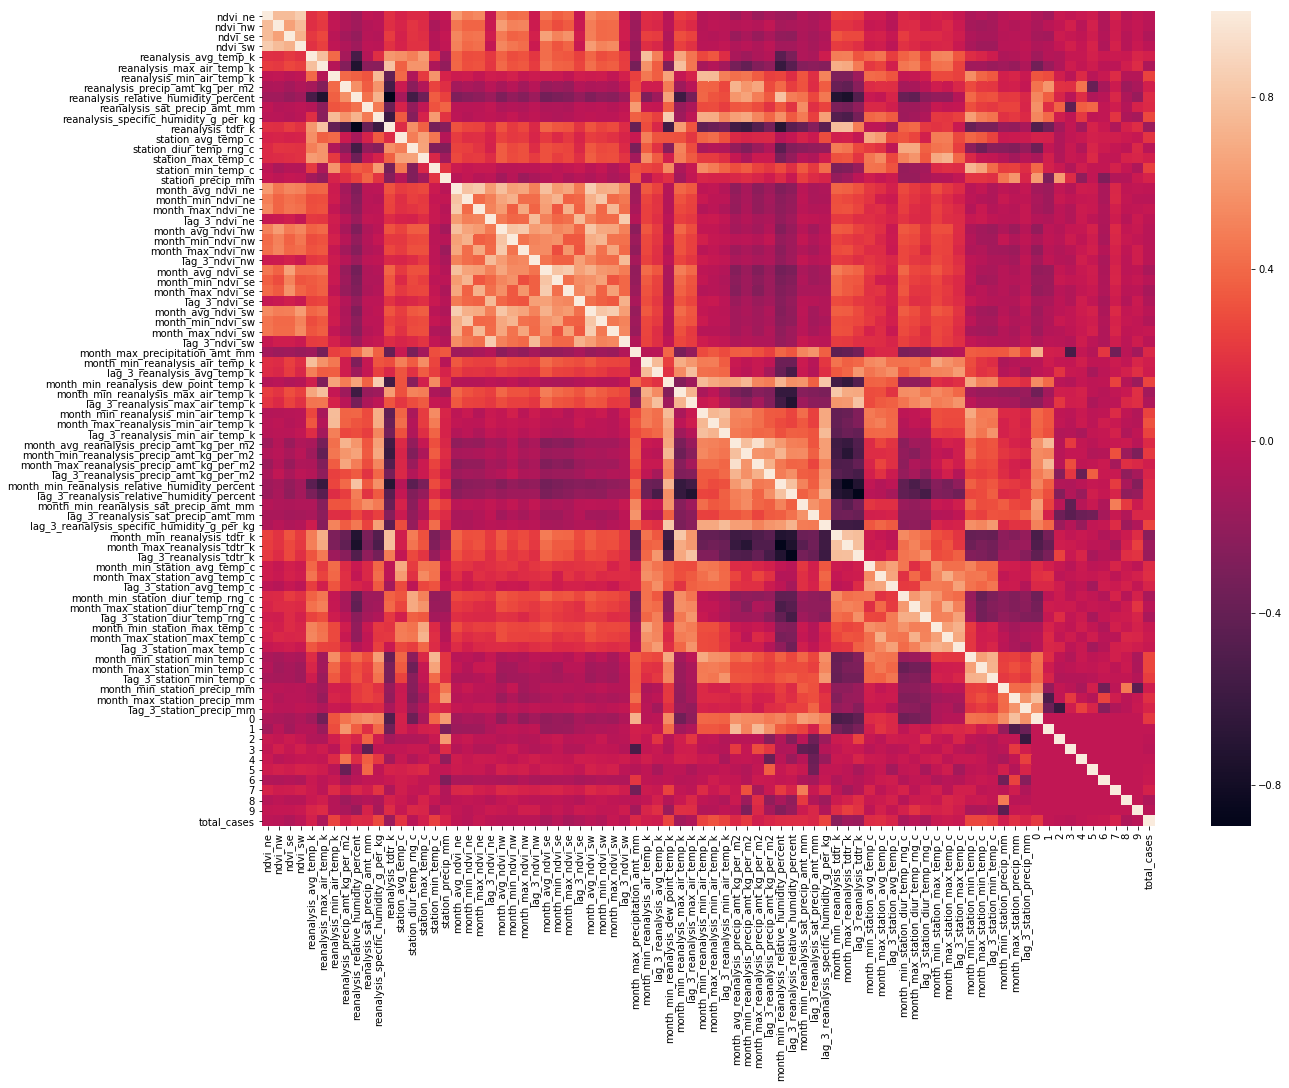

In [25]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)